<a href="https://colab.research.google.com/github/cebisilerhmchunu-max/OIBSIP/blob/main/Wine_Quality_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

# Load the dataset
wine_df = pd.read_csv("/content/WineQT.csv")

# Preview dataset
print("First 5 rows:")
print(wine_df.head())

# Fill missing numeric values with median
wine_df.fillna(wine_df.median(), inplace=True)

# Remove duplicates
wine_df.drop_duplicates(inplace=True)

# Flag outliers and cap them
numeric_cols = wine_df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    q1 = wine_df[col].quantile(0.25)
    q3 = wine_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Flag outliers
    wine_df[f'{col}_outlier'] = ((wine_df[col] < lower_bound) | (wine_df[col] > upper_bound)).astype(int)

    # Optional: cap extreme values
    wine_df[col] = np.where(wine_df[col] < lower_bound, lower_bound, wine_df[col])
    wine_df[col] = np.where(wine_df[col] > upper_bound, upper_bound, wine_df[col])

    print(f"{col}: {wine_df[f'{col}_outlier'].sum()} outliers flagged")

print("\nDataset processed. Shape:", wine_df.shape)


First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5 

In [ ]:
# After cleaning and capping outliers
wine_df.to_csv("winequality_cleaned.csv", index=False)


In [ ]:
wine_df = pd.read_csv("/content/winequality_cleaned.csv")


Descriptive statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.269991          0.529884     0.268290        2.323141   
std         1.630215          0.174273     0.196425        0.609600   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        12.100000          1.011250     0.915000        3.650000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.080926            15.463255             45.127297     0.996725   
std       0.017753             9.725860             29.974752     0.001843   
min       0.040000      

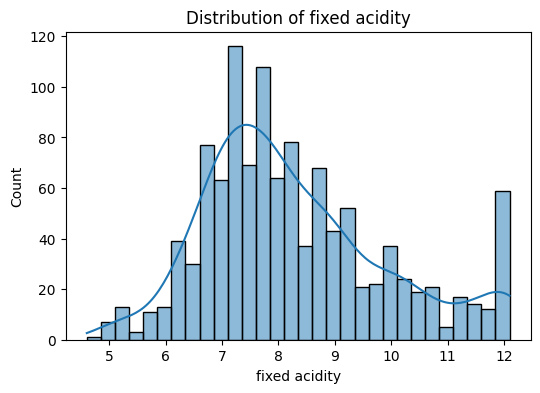

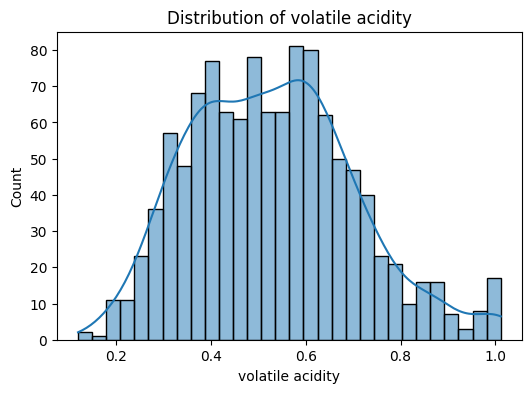

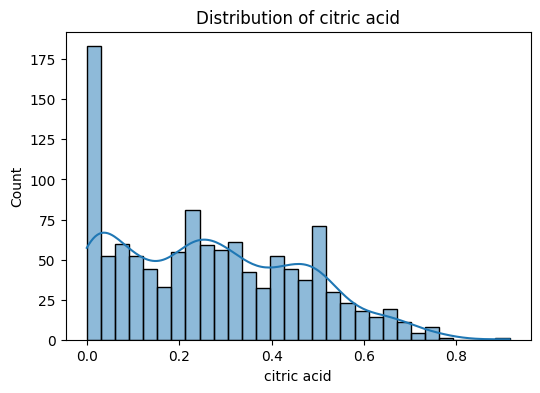

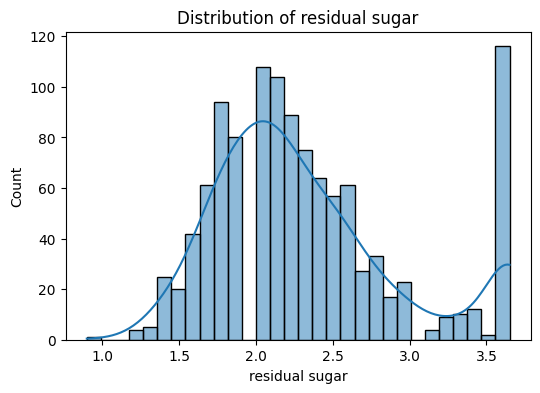

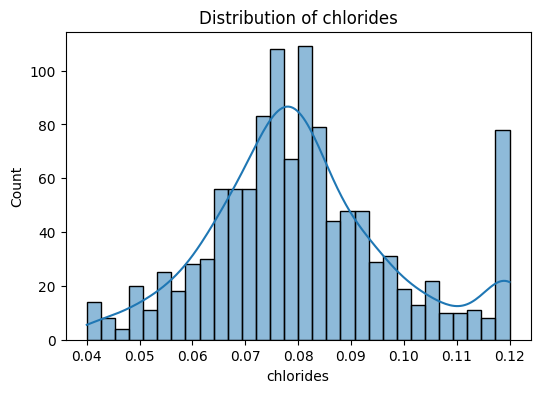

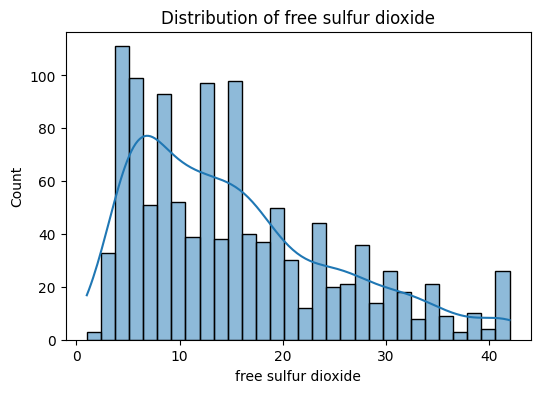

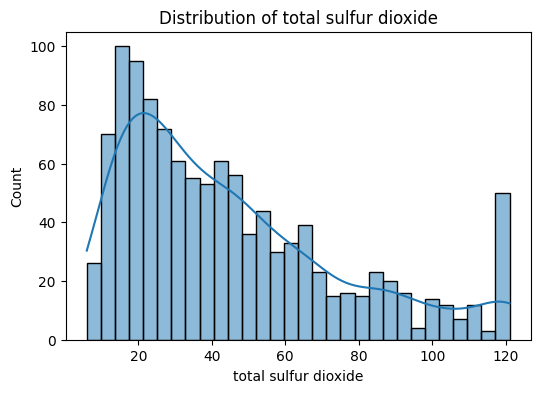

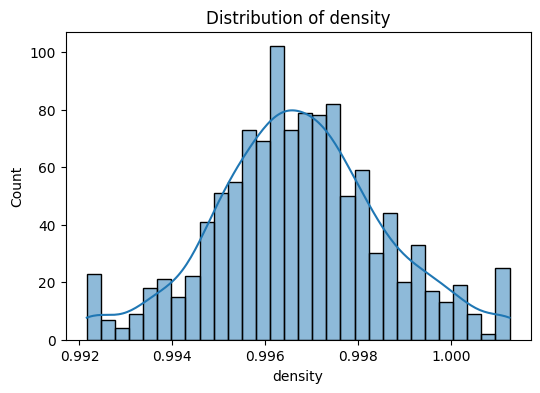

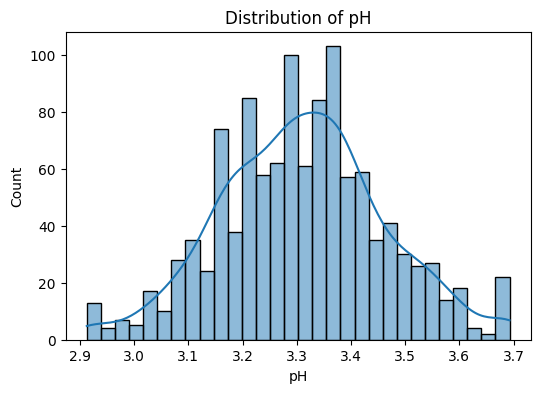

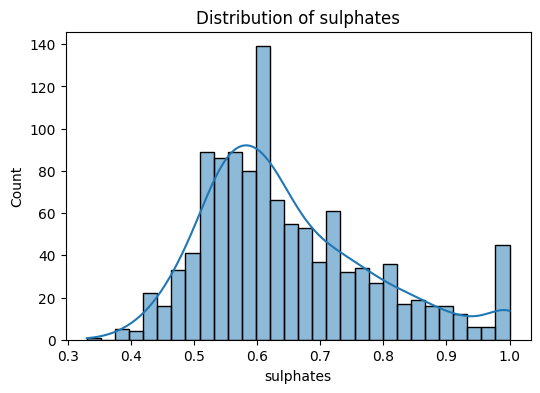

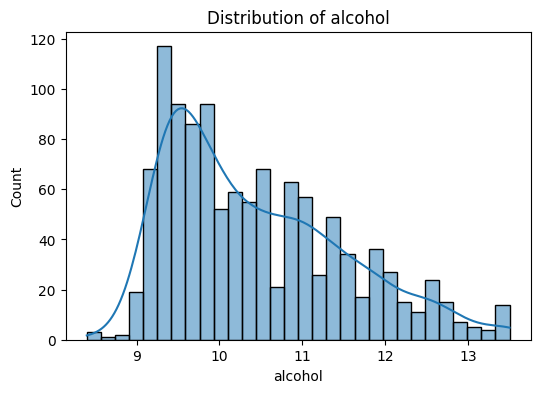

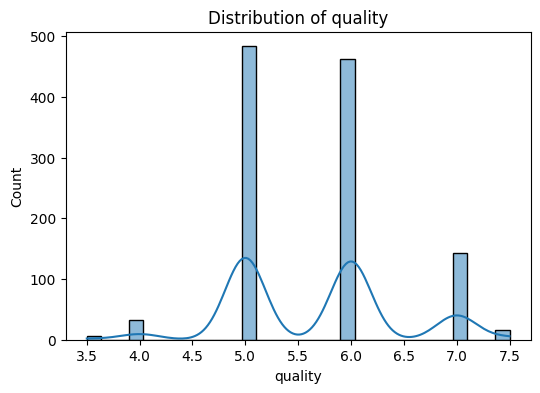

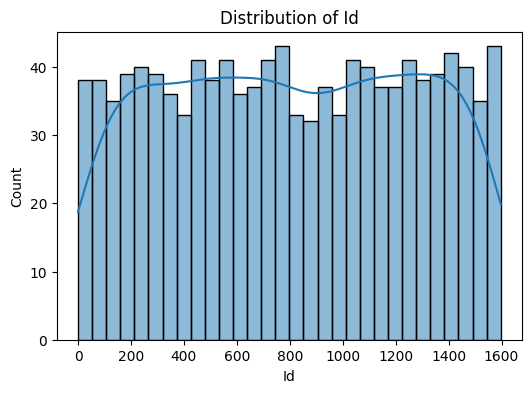

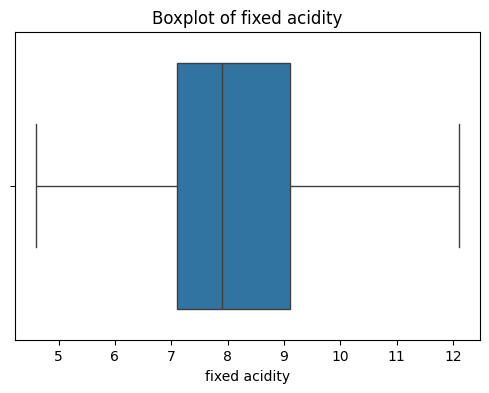

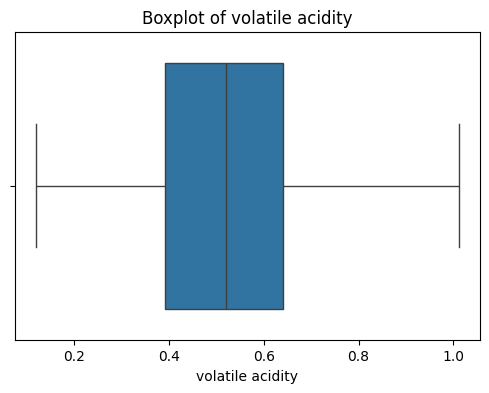

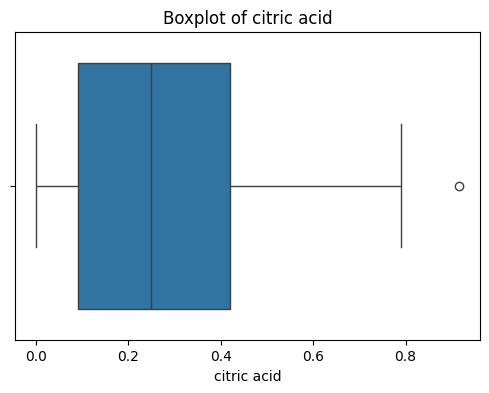

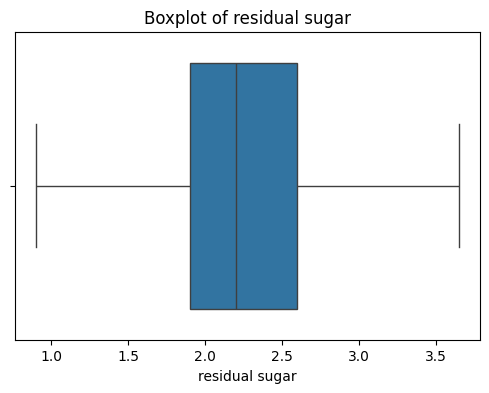

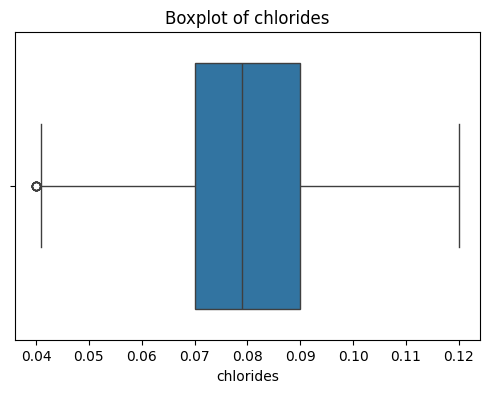

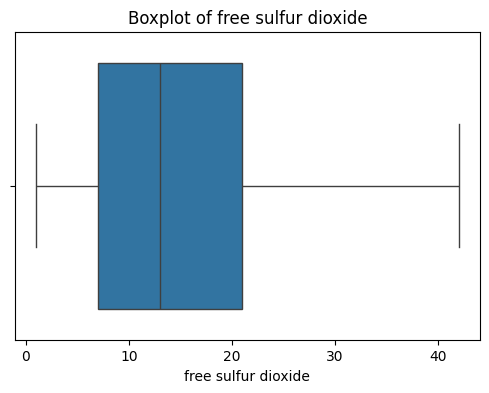

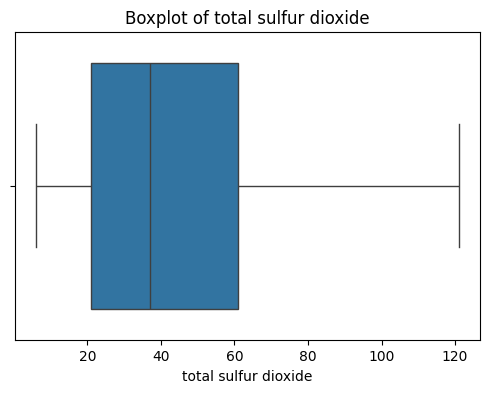

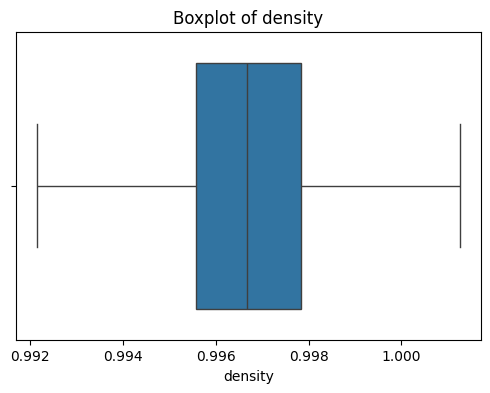

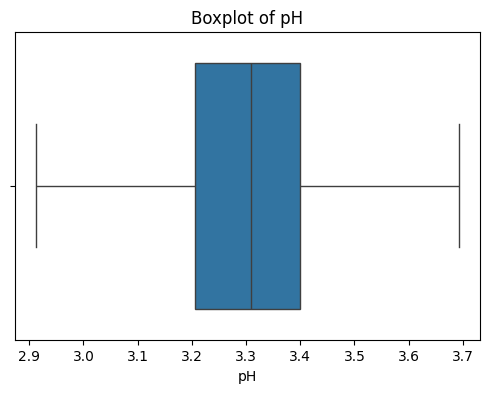

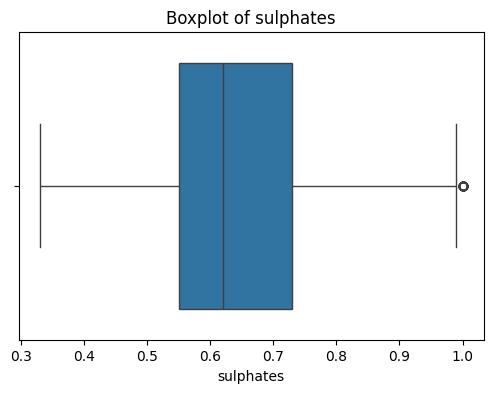

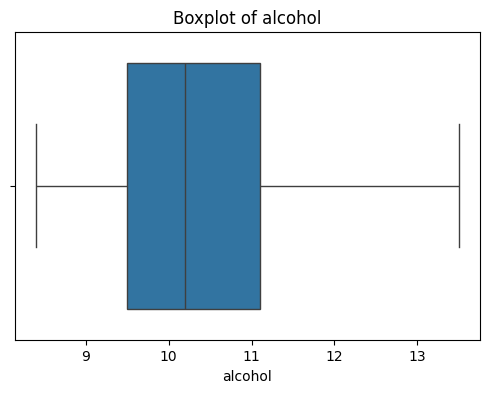

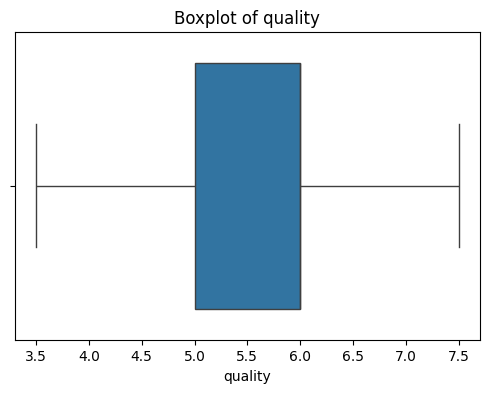

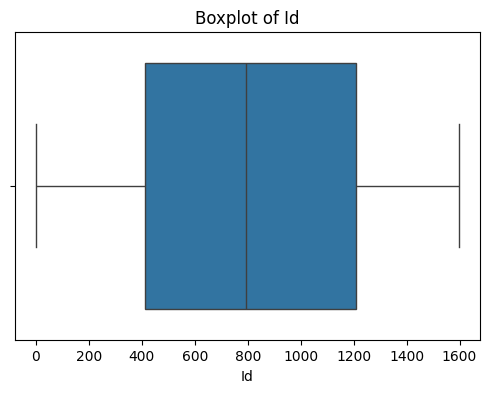

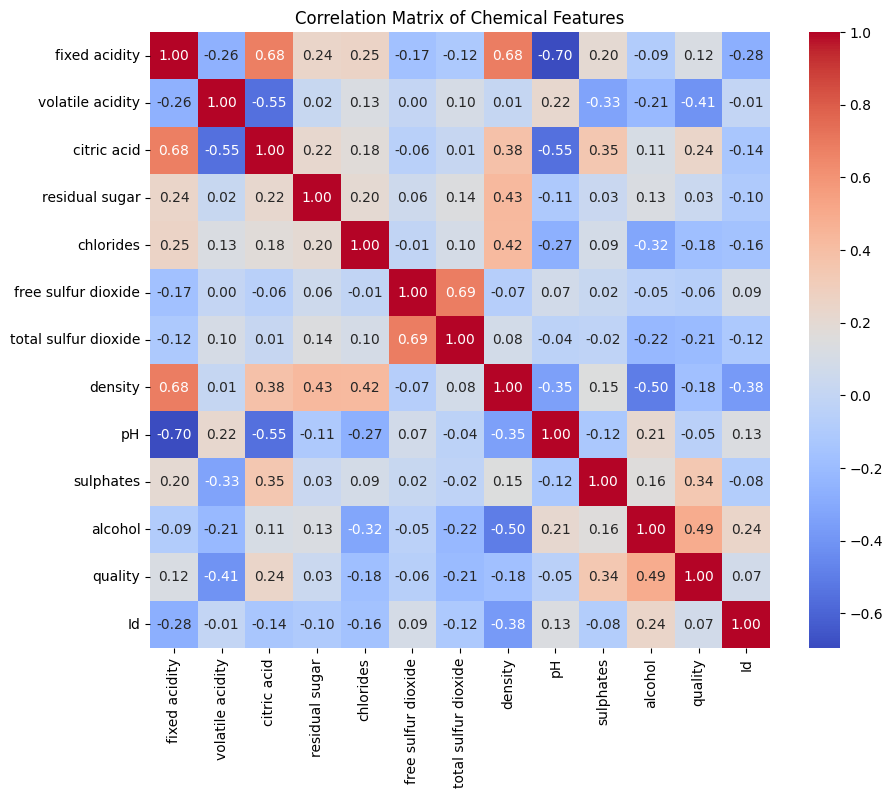

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
wine_df = pd.read_csv("/content/winequality_cleaned.csv")

# Descriptive statistics
print("Descriptive statistics:")
print(wine_df.describe())

# Distribution plots for numeric features
numeric_cols = wine_df.select_dtypes(include='number').columns.drop([col for col in wine_df.columns if 'outlier' in col])

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(wine_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Boxplots to visualize spread and outliers
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=wine_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Correlation matrix
corr_matrix = wine_df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Chemical Features")
plt.show()


In [ ]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset
wine_df = pd.read_csv("/content/winequality_cleaned.csv")
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset
wine_df = pd.read_csv("winequality_cleaned.csv")

# Separate features and target
X = wine_df.drop(columns=['quality'] + [col for col in wine_df.columns if '_outlier' in col])
y = wine_df['quality']

# Scaling numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for convenience
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Optional: Check scaled data
print(X_scaled.describe())

# Separate features and target
X = wine_df.drop(columns=['quality'] + [col for col in wine_df.columns if '_outlier' in col])
y = wine_df['quality']

# Scaling numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for convenience
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Optional: Check scaled data
print(X_scaled.describe())


       fixed acidity  volatile acidity   citric acid  residual sugar  \
count   1.143000e+03      1.143000e+03  1.143000e+03    1.143000e+03   
mean   -7.211107e-16     -2.486589e-17  1.118965e-16   -2.362259e-16   
std     1.000438e+00      1.000438e+00  1.000438e+00    1.000438e+00   
min    -2.252217e+00     -2.352996e+00 -1.366461e+00   -2.335572e+00   
25%    -7.180055e-01     -7.886721e-01 -9.080705e-01   -6.944331e-01   
50%    -2.270579e-01     -5.674089e-02 -9.315314e-02   -2.020913e-01   
75%     5.093635e-01      6.321355e-01  7.726965e-01    4.543644e-01   
max     2.350417e+00      2.763347e+00  3.293847e+00    2.177561e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  1.143000e+03         1.143000e+03          1.143000e+03  1.143000e+03   
mean   1.491953e-16         4.973178e-17          1.243294e-17  9.488823e-14   
std    1.000438e+00         1.000438e+00          1.000438e+00  1.000438e+00   
min   -2.306309e+00        -1.4

In [ ]:
# Import library
from sklearn.model_selection import train_test_split

# Assume X_scaled and y are ready from preprocessing
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Check shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (914, 12)
X_test: (229, 12)
y_train: (914,)
y_test: (229,)


In [ ]:
# Group quality into three classes: low, medium, high
def quality_label(q):
    if q <= 5:
        return 0  # low
    elif q <= 7:
        return 1  # medium
    else:
        return 2  # high

y = wine_df['quality'].apply(quality_label)
print("Class distribution:\n", y.value_counts())


Class distribution:
 quality
1    605
0    522
2     16
Name: count, dtype: int64


Random Forest Accuracy: 0.7991266375545851
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       105
           1       0.79      0.85      0.82       121
           2       1.00      0.33      0.50         3

    accuracy                           0.80       229
   macro avg       0.87      0.65      0.70       229
weighted avg       0.80      0.80      0.80       229

SGD Classifier Accuracy: 0.74235807860262
SGD Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.74       105
           1       0.75      0.76      0.76       121
           2       0.00      0.00      0.00         3

    accuracy                           0.74       229
   macro avg       0.49      0.50      0.50       229
weighted avg       0.73      0.74      0.74       229

SVC Accuracy: 0.7641921397379913
SVC Classification Report:
               precision   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

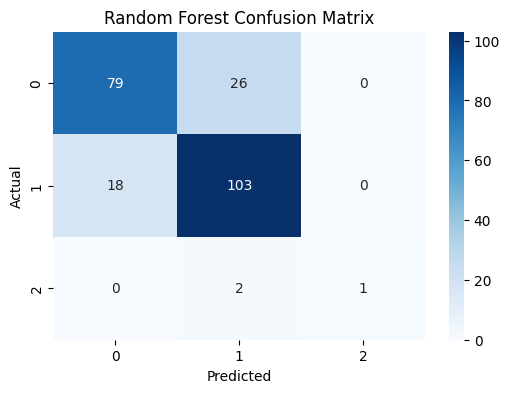

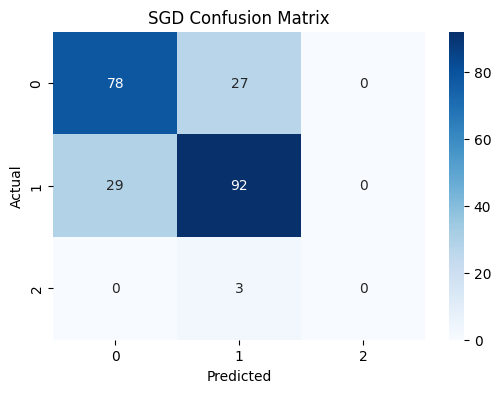

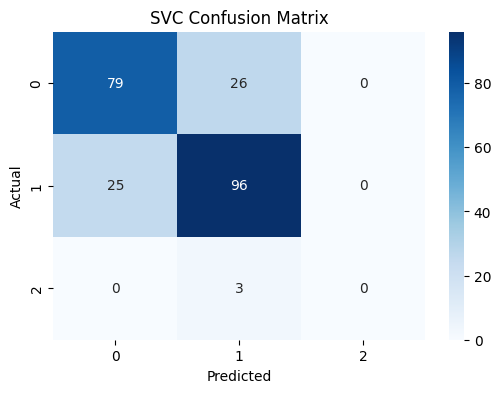

In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
wine_df = pd.read_csv("/content/winequality_cleaned.csv")

# Group quality into classes: low (<=5), medium (6-7), high (>=8)
def quality_label(q):
    if q <= 5:
        return 0  # low
    elif q <= 7:
        return 1  # medium
    else:
        return 2  # high

y = wine_df['quality'].apply(quality_label)

# Features: drop target and outlier flag columns
X = wine_df.drop(columns=['quality'] + [col for col in wine_df.columns if '_outlier' in col])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 1. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# 2. SGD Classifier
sgd_model = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)
print("SGD Classifier Accuracy:", accuracy_score(y_test, y_pred_sgd))
print("SGD Classification Report:\n", classification_report(y_test, y_pred_sgd))

# 3. Support Vector Classifier (SVC)
svc_model = SVC(kernel='rbf', random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("SVC Classification Report:\n", classification_report(y_test, y_pred_svc))

# Confusion matrices
models = {'Random Forest': y_pred_rf, 'SGD': y_pred_sgd, 'SVC': y_pred_svc}
for name, y_pred in models.items():
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


--- Random Forest Evaluation ---
Accuracy: 0.7991266375545851
Precision (macro): 0.8668975105584847
Recall (macro): 0.6456513183785911
F1-score (macro): 0.6998795117606998

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       105
           1       0.79      0.85      0.82       121
           2       1.00      0.33      0.50         3

    accuracy                           0.80       229
   macro avg       0.87      0.65      0.70       229
weighted avg       0.80      0.80      0.80       229



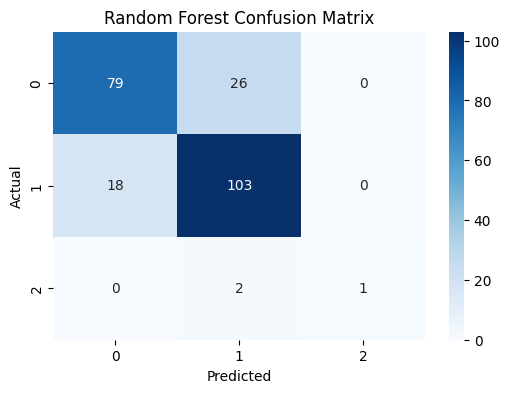

--- SGD Evaluation ---
Accuracy: 0.74235807860262
Precision (macro): 0.49435677442418663
Recall (macro): 0.5010625737898465
F1-score (macro): 0.4976835675647695

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.74       105
           1       0.75      0.76      0.76       121
           2       0.00      0.00      0.00         3

    accuracy                           0.74       229
   macro avg       0.49      0.50      0.50       229
weighted avg       0.73      0.74      0.74       229



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

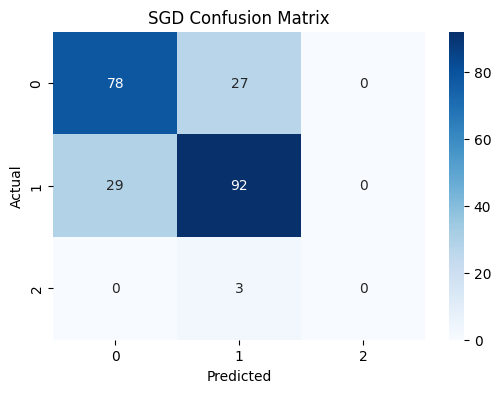

--- SVC Evaluation ---
Accuracy: 0.7641921397379913
Precision (macro): 0.5092051282051282
Recall (macro): 0.5152564607110062
F1-score (macro): 0.5121562220406893

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.76       105
           1       0.77      0.79      0.78       121
           2       0.00      0.00      0.00         3

    accuracy                           0.76       229
   macro avg       0.51      0.52      0.51       229
weighted avg       0.75      0.76      0.76       229



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

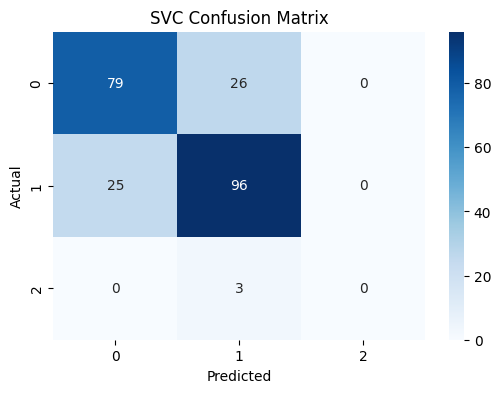

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assume y_test and predictions y_pred_rf, y_pred_sgd, y_pred_svc are ready

models = {
    'Random Forest': y_pred_rf,
    'SGD': y_pred_sgd,
    'SVC': y_pred_svc
}

for name, y_pred in models.items():
    print(f"--- {name} Evaluation ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
    print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
    print("F1-score (macro):", f1_score(y_test, y_pred, average='macro'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


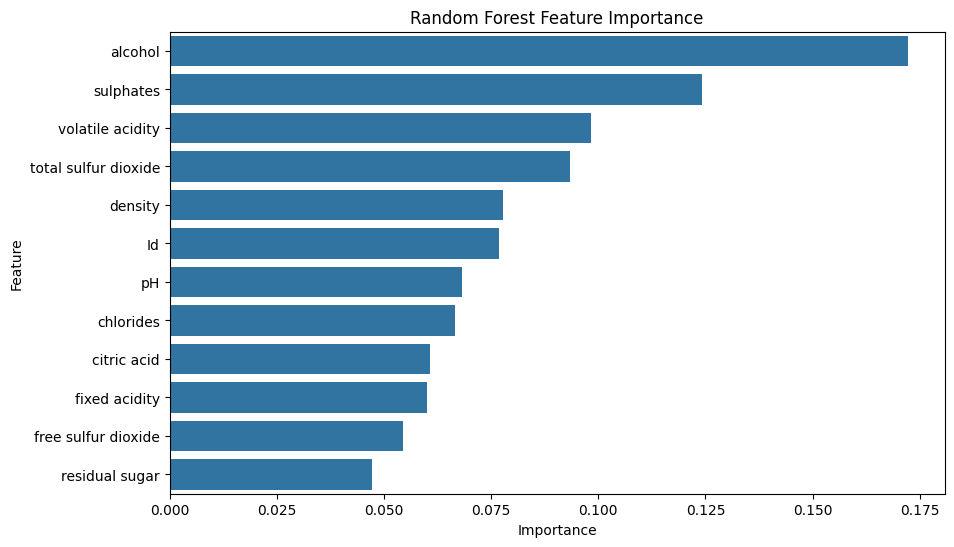

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


           Model  Accuracy  Precision (macro)  Recall (macro)  \
0  Random Forest  0.799127           0.866898        0.645651   
1            SGD  0.742358           0.494357        0.501063   
2            SVC  0.764192           0.509205        0.515256   

   F1-score (macro)  
0          0.699880  
1          0.497684  
2          0.512156  


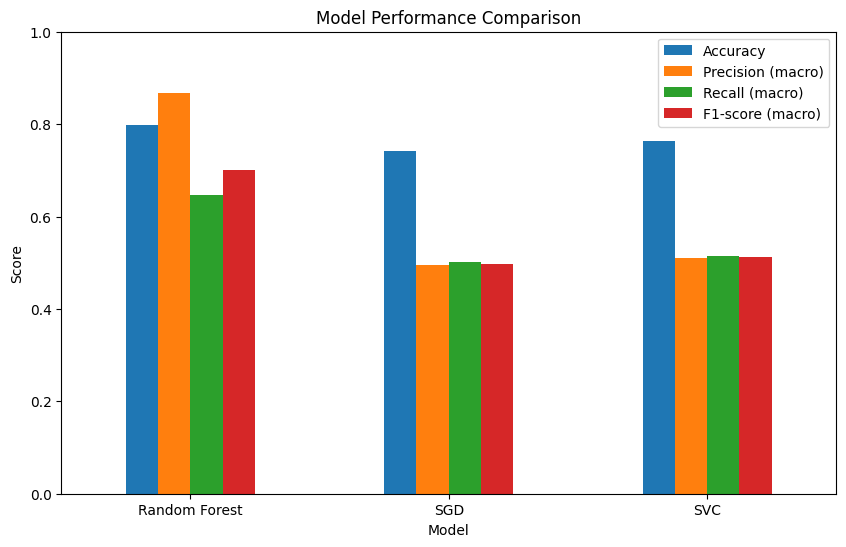

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Feature importance for Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 2. Model performance comparison
model_metrics = pd.DataFrame({
    'Model': ['Random Forest', 'SGD', 'SVC'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_sgd),
        accuracy_score(y_test, y_pred_svc)
    ],
    'Precision (macro)': [
        precision_score(y_test, y_pred_rf, average='macro'),
        precision_score(y_test, y_pred_sgd, average='macro'),
        precision_score(y_test, y_pred_svc, average='macro')
    ],
    'Recall (macro)': [
        recall_score(y_test, y_pred_rf, average='macro'),
        recall_score(y_test, y_pred_sgd, average='macro'),
        recall_score(y_test, y_pred_svc, average='macro')
    ],
    'F1-score (macro)': [
        f1_score(y_test, y_pred_rf, average='macro'),
        f1_score(y_test, y_pred_sgd, average='macro'),
        f1_score(y_test, y_pred_svc, average='macro')
    ]
})

print(model_metrics)

# Visualize comparison
metrics_to_plot = ['Accuracy', 'Precision (macro)', 'Recall (macro)', 'F1-score (macro)']
model_metrics.set_index('Model')[metrics_to_plot].plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.show()
